In [1]:
%reload_ext autoreload
%autoreload 2

In [10]:
import numpy as np
import matplotlib.pyplot as plt

In [24]:
from src.utils.file_utils import load_from_pickle, save_to_pickle
from src.dataset import SyntheticDataset, DechorateDataset
from src.utils.dsp_utils import normalize


In [26]:
path_to_data = '../data/tmp/'

all_rirs = np.load(path_to_data + 'all_rirs.npy')
toa_note = load_from_pickle(path_to_data + 'toa_note.pkl')
datasets = ['000000', '010000', '011000', '011100', '011110', '011111',
            '001000', '000100', '000010', '000001']

In [7]:
i = 0
j = 2
d = 4

In [39]:
L, I, J, D = all_rirs.shape
rir = all_rirs[:, i, j, d]
rir = normalize(rir)

(400, 700)

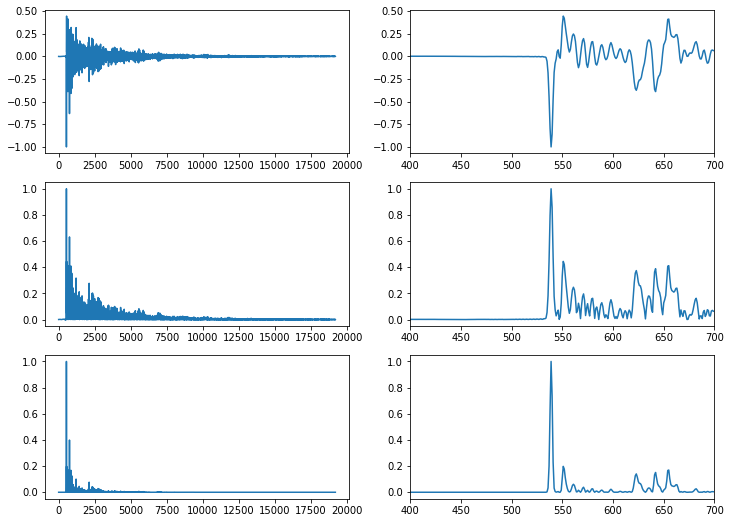

In [46]:
plt.figure(figsize=(12,9))
plt.subplot(321)
plt.plot(rir)
plt.subplot(322)
plt.plot(rir)
plt.xlim([400,700])
plt.subplot(323)
plt.plot(np.abs(rir))
plt.subplot(324)
plt.plot(np.abs(rir))
plt.xlim([400,700])
plt.subplot(325)
plt.plot(np.abs(rir)**2)
plt.subplot(326)
plt.plot(np.abs(rir)**2)
plt.xlim([400,700])

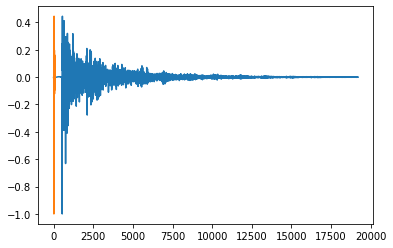

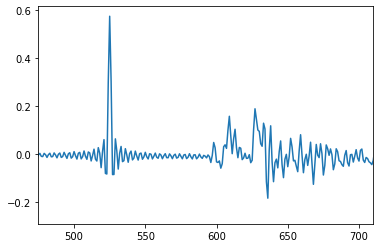

In [54]:
# Direc Path deconvolution
a,b = 525,610
dp = rir[a:b]
p = a

plt.plot(rir)
plt.plot(dp)
plt.show()

dp_deconv = np.real(np.fft.ifft(np.fft.fft(rir, L) / np.fft.fft(dp, L)))[:L-p]
# dp_deconv = np.concatenate([np.zeros(p), dp_deconv])


plt.plot(dp_deconv)
plt.xlim(a-50,b+100)
plt.show()

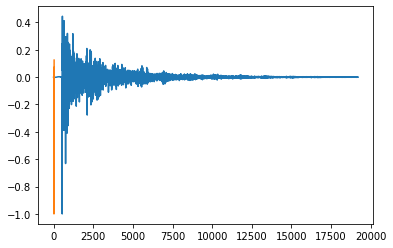

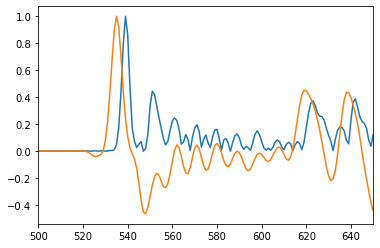

In [109]:
# Direc Path deconvolution
a,b = 520,550
dp = rir[a:b]

plt.plot(rir)
plt.plot(dp)
plt.show()


dp_deconv1 = np.real(np.fft.ifft(np.fft.fft(rir, L) / np.fft.fft(dp, L)))
dp_deconv2 = np.correlate(dp, rir, mode='same')[::-1]

plt.plot(np.abs(rir))
# plt.plot(normalize(dp_deconv1))
plt.plot(normalize(dp_deconv2))
plt.xlim(a-20, b+100)
plt.show()

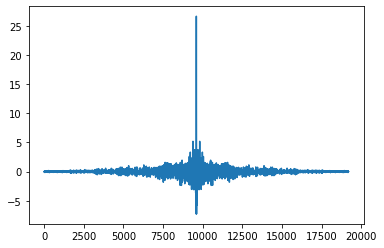

In [111]:
dp_deconv2 = np.correlate(rir, rir, mode='same')[::-1]
plt.plot(dp_deconv2)